<center>
    <h1> Predicting Air Quality for Health Risk Assessment: A Machine Learning Approach </h1>
    <h2> Exploring Support Vector Machines </h2>
    <h3> Divya Neelamegam, Padhma Cebolu Srinivasan, Poojitha Venkat Ram, Shruti Badrinarayanan, Sourabh Suresh Kumar </h3>
</center>

### Load Dataset

In [1]:
import pandas as pd

# Load Dataset
data = pd.read_csv("processed_data.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


### Encode Target Variable - AQI_Bucket

In [2]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for AQI_Bucket
categories_order = [['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape target variable to fit the encoder's expected format
y_reshaped = data['AQI_Bucket'].values.reshape(-1, 1)

# Apply encoder to the target variable
data['Encoded_AQI_Bucket'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_AQI_Bucket' as target variable
y = data['Encoded_AQI_Bucket']

# Drop AQI_Bucket
data = data.drop(columns=['AQI_Bucket'])

In [3]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for City
categories_order = [['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape City variable to fit the encoder's expected format
y_reshaped = data['City'].values.reshape(-1, 1)

# Apply encoder to the City variable
data['Encoded_City'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_City' as target variable
y = data['Encoded_City']

# Drop City
data = data.drop(columns=['City'])

In [4]:
data

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Encoded_AQI_Bucket,Encoded_City
0,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,3.0,0.0
1,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,4.0,0.0
2,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,5.0,0.0
3,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,5.0,0.0
4,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,0.0,25.0
24846,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,1.0,25.0
24847,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,1.0,25.0
24848,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,1.0,25.0


### Drop Variables

In [5]:
# Convert the 'Date' column to a datetime format
data['Date'] = pd.to_datetime(data['Date'])

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

data = data.drop(columns=['Date','AQI'])

### Split the Dataset

In [6]:
from sklearn.model_selection import train_test_split

X = data.drop('Encoded_AQI_Bucket', axis=1)
y = data['Encoded_AQI_Bucket']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Engineering : Feature Importance from Linear SVM

In [7]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Get feature importances from coef_ attribute
feature_importances = svm.coef_[0]

# Create a DataFrame for the feature importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features based on the absolute value of their importance
sorted_features = features_df.reindex(features_df.Importance.abs().sort_values(ascending=False).index)

print(sorted_features)

         Feature  Importance
6             CO   -2.039978
8             O3   -0.144585
11        Xylene    0.093919
13          year    0.092224
4            NOx   -0.079357
1           PM10   -0.070707
12  Encoded_City   -0.066482
2             NO   -0.062043
0          PM2.5   -0.057255
10       Toluene   -0.045715
14         month   -0.042491
9        Benzene    0.042006
5            NH3   -0.034822
15           day    0.017488
7            SO2   -0.015589
3            NO2   -0.001907


#### Observations from Feature Engineering Phase:

Based on the analysis using a linear Support Vector Machine (SVM), our team has ascertained the importance of various features in predicting the target variable. The magnitude of the coefficients derived from the SVM model serves as an indicator of each feature's significance. A feature with a higher absolute coefficient value exerts a stronger influence on the model's decision boundary.

Here are the key findings from our analysis:

1. Carbon Monoxide (CO): CO stands out as the most dominant feature in terms of influence. With the largest coefficient magnitude, it significantly affects the decision boundary, emphasizing its role in the predictions made by the model.

2. O3 (Ozone): O3 follows closely, manifesting as the second most impactful feature, though its importance is notably lesser compared to CO.

3. Other Determinants: Other features, such as Xylene, Year, and NOx, also play a crucial role in the model's predictions. Their coefficient magnitudes, while substantial, are less compared to the primary influencers like CO and O3. This implies that they are significant contributors but might not be the primary drivers in the model's decision-making process.

4. Less Significant Features: Some features like NO2, SO2, and Benzene have relatively smaller coefficient magnitudes, positioning them as the lesser impactful features for the predictions made by our model.

5. Directionality of Coefficients: The sign accompanying each coefficient provides insights into the feature's relationship with the target variable. A positive coefficient showcases a direct correlation with the target variable, implying that higher values of that feature may correlate with higher values of the target. Conversely, a negative coefficient denotes an inverse relationship. For instance, Xylene, having a positive coefficient, indicates its increasing values might relate to a specific class of the target variable. In contrast, features like CO and O3, with their negative coefficients, suggest the opposite trend.

In summary, this analysis sheds light on which features are most influential in the SVM model's predictions. Understanding feature importance is crucial as it provides insights into the data, the model, and potentially the underlying real-world processes being modeled. This information is used to simplify models, improve performance, and focus on the most relevant features.

## SVM Implementation (without oversampling)

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Drop less important features based on feature importance analysis
# Here, dropping features with the least importance: Benzene, NH3, and NO2
data = data.drop(columns=['Benzene', 'NH3', 'NO2'])

# Define your features and target variable
X = data.drop(columns=['Encoded_AQI_Bucket'])  # Assuming Encoded_AQI_Bucket is your target variable
y = data['Encoded_AQI_Bucket']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')

Accuracy: 0.7472837022132797



Accuracy: 0.7472837022132797
Balanced Accuracy: 0.6694197661454725
Average Precision: 0.6839325193079501
F1 Score (Micro): 0.7472837022132797
F1 Score (Macro): 0.6961045741929813
F1 Score (Weighted): 0.741036099122587
Precision: 0.7468962950982241
Recall: 0.7472837022132797
Cohen's Kappa: 0.6510252522445998
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.35      0.48       282
         1.0       0.76      0.82      0.79      1655
         2.0       0.75      0.80      0.77      1745
         3.0       0.66      0.55      0.60       555
         4.0       0.73      0.76      0.75       462
         5.0       0.85      0.73      0.79       271

    accuracy                           0.75      4970
   macro avg       0.75      0.67      0.70      4970
weighted avg       0.75      0.75      0.74      4970



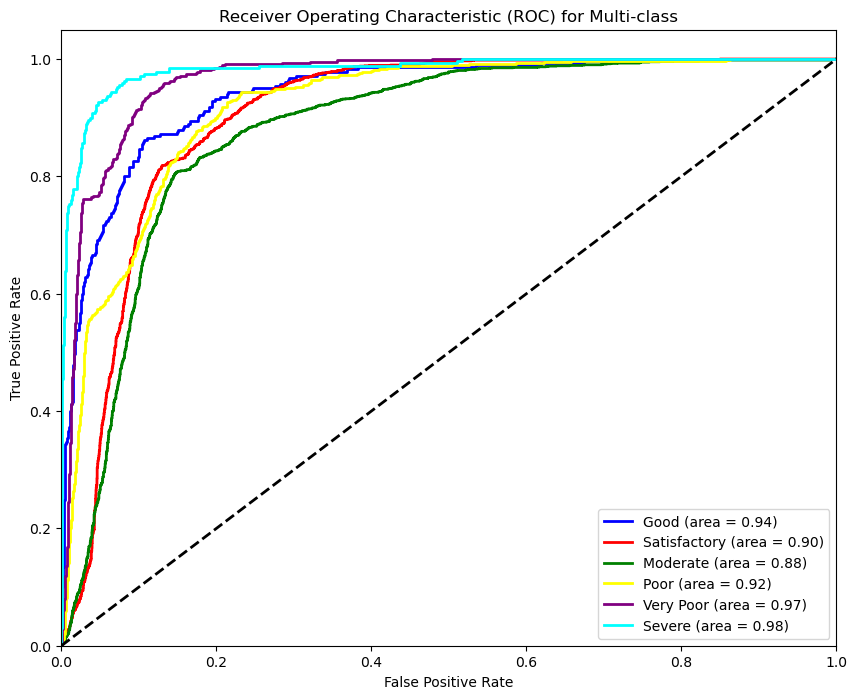

In [9]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             balanced_accuracy_score, average_precision_score, f1_score, log_loss,
                             precision_score, recall_score, roc_auc_score, cohen_kappa_score, roc_curve, auc)
import matplotlib.pyplot as plt

# Define y_proba_ovr before using it
y_proba_ovr = svm_model.decision_function(X_test)

# Now, compute the metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
y_test_bin = pd.get_dummies(y_test)
print(f'Average Precision: {average_precision_score(y_test_bin, y_proba_ovr)}')  # Multi-class classification

print(f'F1 Score (Micro): {f1_score(y_test, y_pred, average="micro")}')
print(f'F1 Score (Macro): {f1_score(y_test, y_pred, average="macro")}')
print(f'F1 Score (Weighted): {f1_score(y_test, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred)}")

print('Classification Report:')
print(classification_report(y_test, y_pred))

# ROC Curve for multi-class using one-vs-rest approach
categories_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
n_classes = len(categories_order)
y_test_bin = pd.get_dummies(y_test)
y_proba_ovr = svm_model.decision_function(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_proba_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(categories_order[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.show()

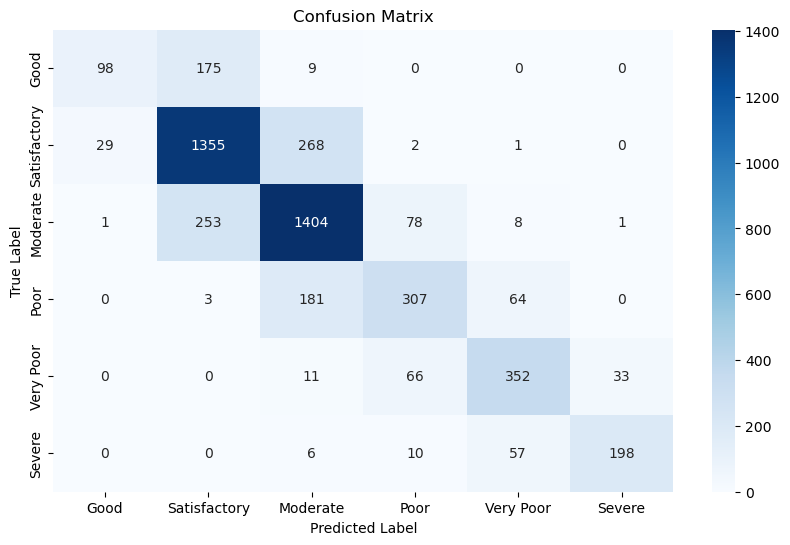

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
class_labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Evaluation and Results

<b> 1. Overview: </b>

The provided data outlines a comprehensive evaluation of a multi-class classification model for air quality using Support Vector Machines (SVM) with a linear kernel. The assessment includes a range of classification metrics in addition to graphical tools like the Receiver Operating Characteristic (ROC) curve and the confusion matrix.

<b> 2. Key Metrics & Analysis: </b>

- Accuracy (0.7473): The SVM model with a linear kernel successfully predicted the air quality class for approximately 74.73% of the test instances. The nearness of validation accuracy to this figure indicates a balance in the model, implying minimal overfitting or underfitting.

- Balanced Accuracy (0.6694): This figure, which is a tad lower than the primary accuracy, gives an insight into the model's performance, accounting for potential imbalances in class distribution. It's an essential measure for datasets where some classes may be underrepresented.

- Average Precision (0.6839): This value represents a consolidated view of precision across varied threshold levels. An average precision score of 0.6839 denotes commendable precision.

- F1 Score (Micro, Macro, Weighted): The F1 score offers a harmonized measure of precision and recall. There's a difference between the micro (0.7473) and macro (0.6961) scores, indicating a disparity in performance across individual classes. The weighted F1 (0.7410) considers the distribution of classes and is slightly lesser than the micro F1.

- Precision & Recall: The precision (0.7469) and recall (0.7473) metrics of the SVM model with a linear kernel are fairly balanced, suggesting an equivalent rate of false positives to false negatives.

- Cohen's Kappa (0.6510): A metric of reliability, Cohen's Kappa determines the congruence between the predicted and observed classifications, factoring in random chance. A value of 0.6510 is indicative of a strong and reliable prediction capability of the model.

- ROC Curve: The curve delineates the model's efficiency for individual classes across multiple thresholds. The Area Under Curve (AUC) for all classes is notably elevated, especially for the "Severe" category, boasting an AUC of 0.98. Such high AUCs signify a proficient distinction capacity between positive and negative classes.

- Confusion Matrix: A visual representation of the model's predictions, the matrix shows true positives, true negatives, false positives, and false negatives for each class. For instance, the "Satisfactory" classification appears to be a strength of the model, with 1355 true positive predictions. However, there's a discernible overlap between "Good" and "Satisfactory" as well as "Moderate" with "Satisfactory" and "Poor".

<b> 3. Conclusions: </b>

Utilizing SVM with a linear kernel, this classification model manifests a promising performance, securing an accuracy of around 74.73%. The AUC values from the ROC curve further underscore its efficacy in differentiating between the classes. Despite some overlap between neighboring air quality grades, as evidenced in the confusion matrix, the model's predictions remain predominantly reliable, supported by the Cohen's Kappa score.

<b> To address the specific misclassifications noted, we will explore hyperparameter tuning on SVM, considering validation accuracy and additional features and how this affects model performance. After this, we will be employing ensemble models such as XGBoost to further improve model performance. </b>